In [93]:
import sys
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
# root_proj = Path("/Users/yk/Documents/Projects/Pre-PhD")
# root_proj = Path("/Users/VERTPOM-UPJV/Documents/Banque_de_l'energie_V2/Data_prediction_K/Pre-PhD")
root_proj = Path("/Users/alesk/Documents/Git-repo/Pre-PhD")
if str(root_proj/"src") not in sys.path:
    sys.path.append(str(root_proj/"src"))

In [94]:
year = 2022
file_name = root_proj / f"DATA_SYSTEM_LIDL/DTS_LIDL_{year}.csv"
dts1 = pd.read_csv(file_name, sep=";")
dts1

,Date,PV,EV
0,1/01/2022 1:00,0.0,0.68
1,1/01/2022 1:15,0.0,0.08
2,1/01/2022 1:30,0.0,0.08
3,1/01/2022 1:45,0.0,0.08
4,1/01/2022 2:00,0.0,0.08
...,...,...,...
34940,31/12/2022 0:00,0.0,0.12
34941,31/12/2022 0:15,0.0,0.08
34942,31/12/2022 0:30,0.0,0.08
34943,31/12/2022 0:45,0.0,0.08


In [ ]:
dts1["Date"] = pd.to_datetime(
    dts1["Date"],
    format="%d/%m/%Y %H:%M"
    # dayfirst=True,
    # utc=True
)-pd.Timedelta(hours=1)  # to localize to CET/CEST

# dts1["Date"] = dts1["Date"].dt.tz_convert("UTC").dt.tz_localize(None
#     # "Europe/Paris",
#     # nonexistent="shift_forward",
#     # ambiguous="NaT"
# )
dts1['offset'] = 



,Date,PV,EV
0,2022-01-01 00:00:00,0.0,0.68
1,2022-01-01 00:15:00,0.0,0.08
2,2022-01-01 00:30:00,0.0,0.08
3,2022-01-01 00:45:00,0.0,0.08
4,2022-01-01 01:00:00,0.0,0.08
...,...,...,...
34940,2022-12-30 23:00:00,0.0,0.12
34941,2022-12-30 23:15:00,0.0,0.08
34942,2022-12-30 23:30:00,0.0,0.08
34943,2022-12-30 23:45:00,0.0,0.08


In [100]:
paristime = dts1["Date"].dt.tz_localize("UTC").dt.tz_convert("Europe/Paris")
utctime = dts1["Date"].dt.tz_localize("UTC")
(paristime-utctime).dt.total_seconds()/3600

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
34940    0.0
34941    0.0
34942    0.0
34943    0.0
34944    0.0
Name: Date, Length: 34945, dtype: float64

In [4]:
d=dts1.index[dts1['Date'] == '27/03/2022 1:00']
dts1.iloc[d[0]:d[0]+10]

,Date,PV,EV
8160,2022-03-27 01:00:00+01:00,0.0,0.080000
8161,2022-03-27 01:15:00+01:00,0.0,0.080000
8162,2022-03-27 01:30:00+01:00,0.0,0.080000
8163,2022-03-27 01:45:00+01:00,0.0,0.080000
8164,2022-03-27 03:00:00+02:00,0.0,0.026667
8165,2022-03-27 03:00:00+02:00,0.0,0.026667
8166,2022-03-27 03:00:00+02:00,0.0,0.026667
8167,2022-03-27 03:00:00+02:00,0.0,0.026667
8168,2022-03-27 03:00:00+02:00,0.0,0.026667
8169,2022-03-27 03:15:00+02:00,0.0,0.026667


In [5]:
temp = pd.read_csv(root_proj / f"DATA_SYSTEM_LIDL/Temperature/orly_{year}_hourly_weather.csv", sep=",")
# temp["Date"]= pd.to_datetime(temp["time"], utc=True)]}
temp["Date"] = pd.to_datetime(temp["time"], utc=True).dt.tz_convert("Europe/Paris")
temp
# temp_wanted = temp[temp["Date"] <= pd.Timestamp("2022-12-31 01:00:00",tz="Etc/GMT-1")]
# temp

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,Date
0,2022-01-01 01:00:00+01:00,9.7,9.6,99.0,0.0,0.0,160.0,5.4,11.0,1026.5,NaN,5.0,2022-01-01 01:00:00+01:00
1,2022-01-01 02:00:00+01:00,9.8,9.7,99.0,0.0,NaN,190.0,3.6,14.8,1026.6,NaN,5.0,2022-01-01 02:00:00+01:00
2,2022-01-01 03:00:00+01:00,9.3,9.2,99.0,0.0,NaN,160.0,3.6,13.0,1026.5,NaN,5.0,2022-01-01 03:00:00+01:00
3,2022-01-01 04:00:00+01:00,8.9,8.9,100.0,0.0,0.0,180.0,5.4,11.0,1026.3,NaN,5.0,2022-01-01 04:00:00+01:00
4,2022-01-01 05:00:00+01:00,8.3,8.3,100.0,0.2,NaN,120.0,5.4,14.8,1026.2,NaN,5.0,2022-01-01 05:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 20:00:00+01:00,14.1,5.5,56.0,0.0,NaN,200.0,20.5,40.8,1013.7,NaN,2.0,2022-12-31 20:00:00+01:00
8756,2022-12-31 21:00:00+01:00,14.0,5.1,55.0,0.0,NaN,200.0,16.6,40.8,1013.8,NaN,2.0,2022-12-31 21:00:00+01:00
8757,2022-12-31 22:00:00+01:00,13.8,4.4,53.0,0.0,0.0,190.0,18.4,37.0,1013.8,NaN,2.0,2022-12-31 22:00:00+01:00
8758,2022-12-31 23:00:00+01:00,14.2,4.2,51.0,0.0,NaN,210.0,18.4,38.9,1014.0,NaN,2.0,2022-12-31 23:00:00+01:00


In [6]:
dts1 = dts1.set_index("Date")
    

In [7]:
temp_wanted = temp[temp["Date"] <= pd.Timestamp("2022-12-31 01:00:00",tz="Etc/GMT-1")]
temp_wanted = temp_wanted.set_index("Date")
dts_t = temp_wanted.resample("15min").ffill()
dts_t


,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
Date,,,,,,,,,,,,
2022-01-01 01:00:00+01:00,2022-01-01 01:00:00+01:00,9.7,9.6,99.0,0.0,0.0,160.0,5.4,11.0,1026.5,NaN,5.0
2022-01-01 01:15:00+01:00,2022-01-01 01:00:00+01:00,9.7,9.6,99.0,0.0,0.0,160.0,5.4,11.0,1026.5,NaN,5.0
2022-01-01 01:30:00+01:00,2022-01-01 01:00:00+01:00,9.7,9.6,99.0,0.0,0.0,160.0,5.4,11.0,1026.5,NaN,5.0
2022-01-01 01:45:00+01:00,2022-01-01 01:00:00+01:00,9.7,9.6,99.0,0.0,0.0,160.0,5.4,11.0,1026.5,NaN,5.0
2022-01-01 02:00:00+01:00,2022-01-01 02:00:00+01:00,9.8,9.7,99.0,0.0,NaN,190.0,3.6,14.8,1026.6,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 00:00:00+01:00,2022-12-31 00:00:00+01:00,14.8,12.5,86.0,0.0,NaN,210.0,27.7,44.5,1009.5,NaN,7.0
2022-12-31 00:15:00+01:00,2022-12-31 00:00:00+01:00,14.8,12.5,86.0,0.0,NaN,210.0,27.7,44.5,1009.5,NaN,7.0
2022-12-31 00:30:00+01:00,2022-12-31 00:00:00+01:00,14.8,12.5,86.0,0.0,NaN,210.0,27.7,44.5,1009.5,NaN,7.0


In [8]:
dts_t = dts_t.reindex(dts1.index)
dts_t


,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
Date,,,,,,,,,,,,
2022-01-01 01:00:00+01:00,2022-01-01 01:00:00+01:00,9.7,9.6,99.0,0.0,0.0,160.0,5.4,11.0,1026.5,NaN,5.0
2022-01-01 01:15:00+01:00,2022-01-01 01:00:00+01:00,9.7,9.6,99.0,0.0,0.0,160.0,5.4,11.0,1026.5,NaN,5.0
2022-01-01 01:30:00+01:00,2022-01-01 01:00:00+01:00,9.7,9.6,99.0,0.0,0.0,160.0,5.4,11.0,1026.5,NaN,5.0
2022-01-01 01:45:00+01:00,2022-01-01 01:00:00+01:00,9.7,9.6,99.0,0.0,0.0,160.0,5.4,11.0,1026.5,NaN,5.0
2022-01-01 02:00:00+01:00,2022-01-01 02:00:00+01:00,9.8,9.7,99.0,0.0,NaN,190.0,3.6,14.8,1026.6,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 00:00:00+01:00,2022-12-31 00:00:00+01:00,14.8,12.5,86.0,0.0,NaN,210.0,27.7,44.5,1009.5,NaN,7.0
2022-12-31 00:15:00+01:00,2022-12-31 00:00:00+01:00,14.8,12.5,86.0,0.0,NaN,210.0,27.7,44.5,1009.5,NaN,7.0
2022-12-31 00:30:00+01:00,2022-12-31 00:00:00+01:00,14.8,12.5,86.0,0.0,NaN,210.0,27.7,44.5,1009.5,NaN,7.0


In [9]:
dts = dts1.join(dts_t.temp)
dts


,PV,EV,temp
Date,,,
2022-01-01 01:00:00+01:00,0.0,0.68,9.7
2022-01-01 01:15:00+01:00,0.0,0.08,9.7
2022-01-01 01:30:00+01:00,0.0,0.08,9.7
2022-01-01 01:45:00+01:00,0.0,0.08,9.7
2022-01-01 02:00:00+01:00,0.0,0.08,9.8
...,...,...,...
2022-12-31 00:00:00+01:00,0.0,0.12,14.8
2022-12-31 00:15:00+01:00,0.0,0.08,14.8
2022-12-31 00:30:00+01:00,0.0,0.08,14.8


In [10]:
dts = dts.reset_index(drop=False)
dts


,Date,PV,EV,temp
0,2022-01-01 01:00:00+01:00,0.0,0.68,9.7
1,2022-01-01 01:15:00+01:00,0.0,0.08,9.7
2,2022-01-01 01:30:00+01:00,0.0,0.08,9.7
3,2022-01-01 01:45:00+01:00,0.0,0.08,9.7
4,2022-01-01 02:00:00+01:00,0.0,0.08,9.8
...,...,...,...,...
34972,2022-12-31 00:00:00+01:00,0.0,0.12,14.8
34973,2022-12-31 00:15:00+01:00,0.0,0.08,14.8
34974,2022-12-31 00:30:00+01:00,0.0,0.08,14.8
34975,2022-12-31 00:45:00+01:00,0.0,0.08,14.8


In [11]:
dts['hour'] = dts['Date'].dt.hour
# dts['minute'] = pd.to_datetime(dts['Date'],dayfirst=True).dt.minute
dts['dayofyear'] = pd.to_datetime(dts['Date'],dayfirst=True).dt.dayofyear
dts['month'] = pd.to_datetime(dts['Date'],dayfirst=True).dt.month
dts['dayofweek'] = pd.to_datetime(dts['Date'],dayfirst=True).dt.dayofweek
dts['hour_sin'] = np.sin(2*np.pi*dts['hour']/24)
dts['hour_cos'] = np.cos(2*np.pi*dts['hour']/24)
dts['doy_sin'] = np.sin(2*np.pi*dts['dayofyear']/365)
dts['doy_cos'] = np.cos(2*np.pi*dts['dayofyear']/365)
dts['dow_sin'] = np.sin(2*np.pi*dts['dayofweek']/7)
dts['dow_cos'] = np.cos(2*np.pi*dts['dayofweek']/7)

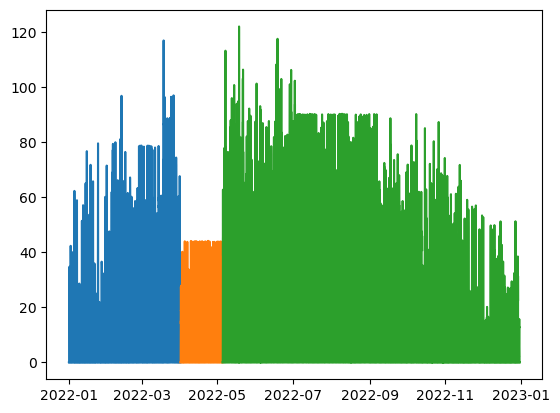

In [12]:
initial = dts.index[dts['Date'] == pd.Timestamp('2022-04-01 01:00:00', tz='Europe/Paris')][0]
final = dts.index[dts['Date'] == pd.Timestamp('2022-05-05 01:00:00', tz='Europe/Paris')][0]

df_train = dts.iloc[:initial]
df_test = dts.iloc[initial:final]
df_after = dts.iloc[final:]
plt.plot(df_train.Date.dt.tz_localize(None), df_train['PV'], label='Train')
plt.plot(df_test.Date.dt.tz_localize(None), df_test['PV'], label='Test')
plt.plot(df_after.Date.dt.tz_localize(None), df_after['PV'], label='After')

In [43]:
from skforecast.recursive import ForecasterRecursive
from skforecast.preprocessing import RollingFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
days = 75
forecaster = ForecasterRecursive(
    # regressor = XGBRegressor(n_estimators=460, learning_rate=0.01, random_state=42),
        regressor = LGBMRegressor(random_state=15926, verbose=-1),
    # regressor = RandomForestRegressor(random_state=42),
    lags = int((60/15)*24*days), # use previous two month
    window_features = RollingFeatures(stats=['max','std'], window_sizes=int((60/15)*24))
)

C:\Users\alesk\AppData\Local\Temp\ipykernel_4784\1451808706.py:7: FutureWarning: The `regressor` argument is deprecated and will be removed in a future version. Please use `estimator` instead.
  forecaster = ForecasterRecursive(


In [67]:
import joblib as jb
import json

output_dir = root_proj / "checkpoints" / "15m" / "pv_60d_lgbm_2022_lim_temp_M_sin_h"

if not (output_dir / "log.json").is_file(): # first train
    output_dir.mkdir(parents=True, exist_ok=True)
    # training
    forecaster.fit(y=df_train['PV'],exog=df_train[['temp','month','hour_sin','hour_cos']], store_in_sample_residuals=True)
    # residuals = forecaster.in_sample_residuals  # 查看训练残差
    # save model
    jb.dump(forecaster, output_dir/"model.joblib")
    # log
    log = {
        "metadata": {
            "description": "recursive rf",
            "lags": int(forecaster.lags[-1]),
            "window_features": {
                "type": forecaster.window_features[0].__class__.__name__ ,
                "stats": forecaster.window_features[0].stats,
                "window_size": forecaster.window_features[0].window_sizes
            },
            "freq": "15min"
        },
        # "residuals": forecaster.in_sample_residuals
    }
    # save log
    with open(output_dir/"log.json", "w") as f:
        json.dump(log, f, indent=2)
    print("End of training")
else:
    # 加载模型 | load model
    forecaster = jb.load(output_dir/"model.joblib")
    # load log
    with open(output_dir/"log.json", "r") as f:
        log = json.load(f)
    print("Loaded")

Loaded


In [68]:
yhat_test = forecaster.predict(steps=len(df_test), exog=df_test[['temp','month','hour_sin','hour_cos']])

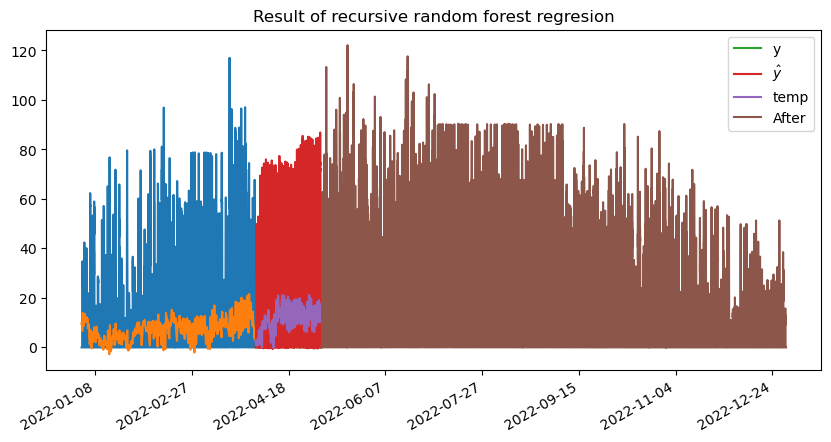

In [72]:
# Save and display the plot
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Result of recursive random forest regresion")
ax.plot(df_train['Date'],df_train['PV'])
ax.plot(df_train['Date'],df_train['temp'])
ax.plot(df_test['Date'], df_test['PV'], label='y')
ax.plot(df_test['Date'], yhat_test, label=r'$\hat{y}$')
ax.plot(df_test['Date'],df_test['temp'], label='temp')
ax.plot(df_after.Date.dt.tz_localize(None), df_after['PV'], label='After')

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

# optional: minor ticks every 6 hours
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))

ax.legend()

fig.autofmt_xdate() # for rotation
fig.savefig(output_dir / "prediction_test.png", dpi=300, bbox_inches='tight')
plt.show()

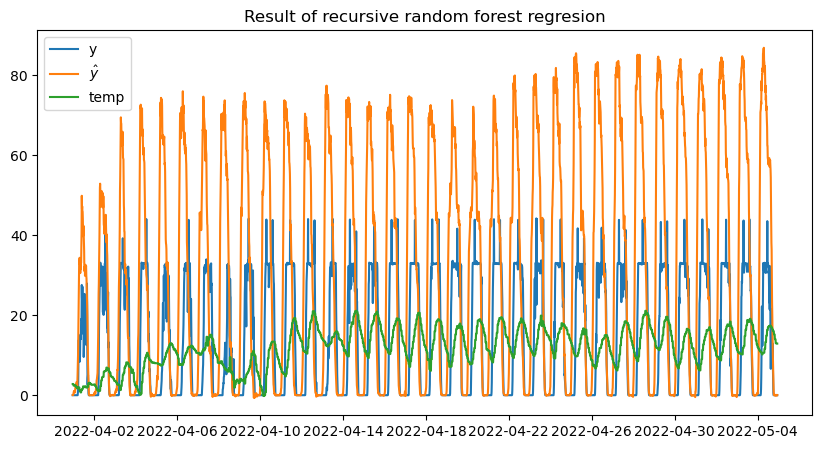

In [70]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Result of recursive random forest regresion")
# ax.plot(df_train['Date'],df_train['PV'])
# ax.plot(df_train['Date'],df_train['temp'])
ax.plot(df_test['Date'], df_test['PV'], label='y')
ax.plot(df_test['Date'], yhat_test, label=r'$\hat{y}$')
ax.plot(df_test['Date'],df_test['temp'], label='temp')
# ax.plot(df_after['Date'],df_after['PV'])

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

# optional: minor ticks every 6 hours
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))

ax.legend()